<a href="https://colab.research.google.com/github/Jeba-Maliha/Machine-Learning/blob/main/Regression_Analysis_on_Weather_Data_Using_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [2]:
# prompt: file upload

from google.colab import files
uploaded = files.upload()

Saving austin_weather.csv to austin_weather.csv


In [3]:
path = '/content/austin_weather.csv'
df = pd.read_csv(path)
df = df.drop('Events', axis=1)
df = df.drop('Date', axis=1)
df

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,29.88,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,29.81,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,29.79,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,29.87,10,10,10,13,4,20,0


In [4]:
df = df.replace('-', pd.NA)
df = df.replace('T', pd.NA)
df = df.dropna()

In [5]:
df = df.reset_index(drop=True)
df

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0
4,57,48,39,39,36,33,79,63,47,30.47,30.4,30.34,10,9,7,12,3,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,103,89,75,71,67,61,82,54,25,30.04,29.97,29.88,10,10,10,12,5,21,0
1179,105,91,76,71,64,55,87,54,20,29.97,29.9,29.81,10,10,10,14,5,20,0
1180,107,92,77,72,64,55,82,51,19,29.91,29.86,29.79,10,10,10,12,4,17,0
1181,106,93,79,70,68,63,69,48,27,29.96,29.91,29.87,10,10,10,13,4,20,0


In [6]:
# Hyperparameters
input_size = 18  #input dim
output_dim = 1
learning_rate = 0.0001
num_epochs = 100
batch_size = 1

In [7]:
labels = df['TempAvgF'].to_numpy(dtype='int64')
labels

array([60, 48, 45, ..., 92, 93, 88])

In [8]:
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = df.drop('TempAvgF', axis=1)
print(data.shape)

(1183, 18)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.3, random_state=101)

In [10]:
data = data.to_numpy(dtype='float32')
#data = stats.zscore(data, axis=1)
data = scaler.fit_transform(data)
print(data.shape)
#data = data.reshape(data.shape[0], data.shape[1], 1)
data

(1183, 18)


array([[0.56      , 0.4193548 , 0.80597013, ..., 0.27272728, 0.45833337,
        0.08846154],
       [0.32      , 0.32258064, 0.44776118, ..., 0.45454547, 0.33333337,
        0.        ],
       [0.3466667 , 0.2096774 , 0.26865673, ..., 0.18181819, 0.0625    ,
        0.        ],
       ...,
       [1.        , 0.9354839 , 0.88059694, ..., 0.27272728, 0.16666669,
        0.        ],
       [0.98666674, 0.9677419 , 0.8507462 , ..., 0.27272728, 0.22916669,
        0.        ],
       [0.8933334 , 0.9354839 , 0.7910447 , ..., 0.27272728, 0.22916669,
        0.        ]], dtype=float32)

In [11]:
data.shape

(1183, 18)

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
    def __init__(self, datas, labels):
        self.datas = datas  # Convert Series to NumPy array
        self.labels = labels  # Convert Series to NumPy array

    def __len__(self):
        return len(self.datas)

    def __getitem__(self, idx):
        data = self.datas[idx]
        label = self.labels[idx]
        out = torch.tensor(data, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)
        # print(out)
        return out

In [13]:
from re import X
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset = CustomDataset(data, labels)
train_set , test_set = torch.utils.data.random_split(dataset, [int(0.8*len(dataset)), len(dataset) - int(0.8*len(dataset))])
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [14]:
dataset[0]

(tensor([0.5600, 0.4194, 0.8060, 0.6029, 0.5616, 0.8889, 0.6857, 0.5663, 0.1917,
         0.1092, 0.1500, 1.0000, 0.6250, 0.2000, 0.6087, 0.2727, 0.4583, 0.0885]),
 tensor(60.))

In [15]:
# for batch_idx, (data, target) in enumerate(train_loader):
#     print(f"Batch {batch_idx}:")
#     print("Data:", data)
#     print("Target:", target)
#     break  # Stop after the first batch

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
class NeuralNet(nn.Module):
  def __init__(self, input_size):
    super(NeuralNet, self).__init__()
    self.input_size = input_size

    self.fc1 = nn.Linear(input_size, 100)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(100, 50)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(50, 1)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.relu2(out)
    out = self.fc3(out)
    return out.squeeze()

In [17]:
# Initialize the model
model = NeuralNet(input_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
print(model)

NeuralNet(
  (fc1): Linear(in_features=18, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=1, bias=True)
)


In [19]:
from tqdm import tqdm
# Train the model
def train_model():
  model.train()
  losses = []
  for epoch in range(num_epochs):
    total_loss = 0
    for i, (datas, labels) in enumerate(tqdm(train_loader)):
      datas = datas.to(device)
      labels = labels.to(device)

      # Forward pass
      outputs = model(datas)
      # print("OUTPUTS")
      # print(outputs)
      # print("Labels")
      # print(labels)
      loss = criterion(outputs, labels)

      # Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      total_loss += loss.item()

    loss = total_loss/len(train_loader)
    losses.append(loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')
  return losses

In [20]:
print("NeuralNet TRAINING")
nnLoss = train_model()

NeuralNet TRAINING


  0%|          | 0/946 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 946/946 [00:02<00:00, 413.16it/s]


Epoch [1/100], Loss: 3500.2116


100%|██████████| 946/946 [00:01<00:00, 580.54it/s]


Epoch [2/100], Loss: 140.6681


100%|██████████| 946/946 [00:01<00:00, 519.18it/s]


Epoch [3/100], Loss: 77.9505


100%|██████████| 946/946 [00:01<00:00, 475.90it/s]


Epoch [4/100], Loss: 63.8125


100%|██████████| 946/946 [00:01<00:00, 588.19it/s]


Epoch [5/100], Loss: 50.7261


100%|██████████| 946/946 [00:01<00:00, 589.86it/s]


Epoch [6/100], Loss: 38.9241


100%|██████████| 946/946 [00:01<00:00, 585.19it/s]


Epoch [7/100], Loss: 28.9480


100%|██████████| 946/946 [00:01<00:00, 582.29it/s]


Epoch [8/100], Loss: 21.0824


100%|██████████| 946/946 [00:01<00:00, 588.33it/s]


Epoch [9/100], Loss: 15.2767


100%|██████████| 946/946 [00:01<00:00, 575.00it/s]


Epoch [10/100], Loss: 11.3369


100%|██████████| 946/946 [00:02<00:00, 466.45it/s]


Epoch [11/100], Loss: 8.9500


100%|██████████| 946/946 [00:01<00:00, 552.38it/s]


Epoch [12/100], Loss: 7.4748


100%|██████████| 946/946 [00:01<00:00, 590.97it/s]


Epoch [13/100], Loss: 6.4251


100%|██████████| 946/946 [00:01<00:00, 584.71it/s]


Epoch [14/100], Loss: 5.4978


100%|██████████| 946/946 [00:01<00:00, 588.99it/s]


Epoch [15/100], Loss: 4.8108


100%|██████████| 946/946 [00:01<00:00, 596.50it/s]


Epoch [16/100], Loss: 4.2082


100%|██████████| 946/946 [00:01<00:00, 588.02it/s]


Epoch [17/100], Loss: 3.7040


100%|██████████| 946/946 [00:01<00:00, 526.65it/s]


Epoch [18/100], Loss: 3.2322


100%|██████████| 946/946 [00:01<00:00, 485.59it/s]


Epoch [19/100], Loss: 2.8763


100%|██████████| 946/946 [00:01<00:00, 586.78it/s]


Epoch [20/100], Loss: 2.5666


100%|██████████| 946/946 [00:01<00:00, 580.12it/s]


Epoch [21/100], Loss: 2.3246


100%|██████████| 946/946 [00:01<00:00, 597.51it/s]


Epoch [22/100], Loss: 2.0771


100%|██████████| 946/946 [00:01<00:00, 585.93it/s]


Epoch [23/100], Loss: 1.8384


100%|██████████| 946/946 [00:01<00:00, 597.11it/s]


Epoch [24/100], Loss: 1.6742


100%|██████████| 946/946 [00:01<00:00, 564.74it/s]


Epoch [25/100], Loss: 1.5117


100%|██████████| 946/946 [00:02<00:00, 458.96it/s]


Epoch [26/100], Loss: 1.3861


100%|██████████| 946/946 [00:02<00:00, 450.49it/s]


Epoch [27/100], Loss: 1.2715


100%|██████████| 946/946 [00:01<00:00, 515.74it/s]


Epoch [28/100], Loss: 1.1759


100%|██████████| 946/946 [00:01<00:00, 600.10it/s]


Epoch [29/100], Loss: 1.0871


100%|██████████| 946/946 [00:01<00:00, 592.41it/s]


Epoch [30/100], Loss: 1.0120


100%|██████████| 946/946 [00:01<00:00, 587.20it/s]


Epoch [31/100], Loss: 0.9550


100%|██████████| 946/946 [00:01<00:00, 570.89it/s]


Epoch [32/100], Loss: 0.8940


100%|██████████| 946/946 [00:02<00:00, 462.22it/s]


Epoch [33/100], Loss: 0.8486


100%|██████████| 946/946 [00:01<00:00, 526.34it/s]


Epoch [34/100], Loss: 0.8172


100%|██████████| 946/946 [00:01<00:00, 572.42it/s]


Epoch [35/100], Loss: 0.7798


100%|██████████| 946/946 [00:01<00:00, 568.04it/s]


Epoch [36/100], Loss: 0.7413


100%|██████████| 946/946 [00:01<00:00, 574.68it/s]


Epoch [37/100], Loss: 0.7185


100%|██████████| 946/946 [00:01<00:00, 570.37it/s]


Epoch [38/100], Loss: 0.6900


100%|██████████| 946/946 [00:01<00:00, 570.13it/s]


Epoch [39/100], Loss: 0.6922


100%|██████████| 946/946 [00:01<00:00, 484.80it/s]


Epoch [40/100], Loss: 0.6634


100%|██████████| 946/946 [00:01<00:00, 499.98it/s]


Epoch [41/100], Loss: 0.6502


100%|██████████| 946/946 [00:01<00:00, 569.65it/s]


Epoch [42/100], Loss: 0.6203


100%|██████████| 946/946 [00:01<00:00, 579.26it/s]


Epoch [43/100], Loss: 0.6093


100%|██████████| 946/946 [00:01<00:00, 586.22it/s]


Epoch [44/100], Loss: 0.5865


100%|██████████| 946/946 [00:01<00:00, 580.33it/s]


Epoch [45/100], Loss: 0.5993


100%|██████████| 946/946 [00:01<00:00, 580.91it/s]


Epoch [46/100], Loss: 0.5629


100%|██████████| 946/946 [00:01<00:00, 542.99it/s]


Epoch [47/100], Loss: 0.5564


100%|██████████| 946/946 [00:02<00:00, 463.76it/s]


Epoch [48/100], Loss: 0.5333


100%|██████████| 946/946 [00:01<00:00, 566.02it/s]


Epoch [49/100], Loss: 0.5360


100%|██████████| 946/946 [00:01<00:00, 588.23it/s]


Epoch [50/100], Loss: 0.5125


100%|██████████| 946/946 [00:01<00:00, 577.06it/s]


Epoch [51/100], Loss: 0.4990


100%|██████████| 946/946 [00:01<00:00, 582.61it/s]


Epoch [52/100], Loss: 0.4896


100%|██████████| 946/946 [00:01<00:00, 581.33it/s]


Epoch [53/100], Loss: 0.4788


100%|██████████| 946/946 [00:01<00:00, 584.43it/s]


Epoch [54/100], Loss: 0.4651


100%|██████████| 946/946 [00:01<00:00, 493.92it/s]


Epoch [55/100], Loss: 0.4687


100%|██████████| 946/946 [00:01<00:00, 524.01it/s]


Epoch [56/100], Loss: 0.4513


100%|██████████| 946/946 [00:01<00:00, 570.46it/s]


Epoch [57/100], Loss: 0.4449


100%|██████████| 946/946 [00:01<00:00, 581.49it/s]


Epoch [58/100], Loss: 0.4273


100%|██████████| 946/946 [00:01<00:00, 580.75it/s]


Epoch [59/100], Loss: 0.4245


100%|██████████| 946/946 [00:01<00:00, 579.90it/s]


Epoch [60/100], Loss: 0.4254


100%|██████████| 946/946 [00:01<00:00, 583.55it/s]


Epoch [61/100], Loss: 0.4196


100%|██████████| 946/946 [00:01<00:00, 514.70it/s]


Epoch [62/100], Loss: 0.3958


100%|██████████| 946/946 [00:01<00:00, 481.14it/s]


Epoch [63/100], Loss: 0.4057


100%|██████████| 946/946 [00:01<00:00, 581.00it/s]


Epoch [64/100], Loss: 0.3956


100%|██████████| 946/946 [00:01<00:00, 586.94it/s]


Epoch [65/100], Loss: 0.3801


100%|██████████| 946/946 [00:01<00:00, 588.04it/s]


Epoch [66/100], Loss: 0.3782


100%|██████████| 946/946 [00:01<00:00, 589.75it/s]


Epoch [67/100], Loss: 0.3716


100%|██████████| 946/946 [00:01<00:00, 588.75it/s]


Epoch [68/100], Loss: 0.3624


100%|██████████| 946/946 [00:01<00:00, 569.58it/s]


Epoch [69/100], Loss: 0.3635


100%|██████████| 946/946 [00:02<00:00, 458.53it/s]


Epoch [70/100], Loss: 0.3470


100%|██████████| 946/946 [00:01<00:00, 586.61it/s]


Epoch [71/100], Loss: 0.3482


100%|██████████| 946/946 [00:01<00:00, 583.06it/s]


Epoch [72/100], Loss: 0.3296


100%|██████████| 946/946 [00:01<00:00, 588.83it/s]


Epoch [73/100], Loss: 0.3337


100%|██████████| 946/946 [00:01<00:00, 588.11it/s]


Epoch [74/100], Loss: 0.3268


100%|██████████| 946/946 [00:01<00:00, 594.76it/s]


Epoch [75/100], Loss: 0.3220


100%|██████████| 946/946 [00:01<00:00, 587.76it/s]


Epoch [76/100], Loss: 0.3185


100%|██████████| 946/946 [00:01<00:00, 493.60it/s]


Epoch [77/100], Loss: 0.3112


100%|██████████| 946/946 [00:01<00:00, 503.84it/s]


Epoch [78/100], Loss: 0.3105


100%|██████████| 946/946 [00:01<00:00, 583.66it/s]


Epoch [79/100], Loss: 0.3054


100%|██████████| 946/946 [00:01<00:00, 588.81it/s]


Epoch [80/100], Loss: 0.2955


100%|██████████| 946/946 [00:01<00:00, 594.72it/s]


Epoch [81/100], Loss: 0.2823


100%|██████████| 946/946 [00:01<00:00, 587.38it/s]


Epoch [82/100], Loss: 0.2819


100%|██████████| 946/946 [00:01<00:00, 589.92it/s]


Epoch [83/100], Loss: 0.2816


100%|██████████| 946/946 [00:01<00:00, 546.99it/s]


Epoch [84/100], Loss: 0.2687


100%|██████████| 946/946 [00:02<00:00, 467.99it/s]


Epoch [85/100], Loss: 0.2678


100%|██████████| 946/946 [00:01<00:00, 574.47it/s]


Epoch [86/100], Loss: 0.2607


100%|██████████| 946/946 [00:01<00:00, 588.24it/s]


Epoch [87/100], Loss: 0.2529


100%|██████████| 946/946 [00:01<00:00, 581.65it/s]


Epoch [88/100], Loss: 0.2584


100%|██████████| 946/946 [00:01<00:00, 592.80it/s]


Epoch [89/100], Loss: 0.2437


100%|██████████| 946/946 [00:01<00:00, 588.51it/s]


Epoch [90/100], Loss: 0.2492


100%|██████████| 946/946 [00:01<00:00, 576.02it/s]


Epoch [91/100], Loss: 0.2496


100%|██████████| 946/946 [00:01<00:00, 504.36it/s]


Epoch [92/100], Loss: 0.2425


100%|██████████| 946/946 [00:01<00:00, 512.04it/s]


Epoch [93/100], Loss: 0.2370


100%|██████████| 946/946 [00:01<00:00, 585.51it/s]


Epoch [94/100], Loss: 0.2358


100%|██████████| 946/946 [00:01<00:00, 581.42it/s]


Epoch [95/100], Loss: 0.2331


100%|██████████| 946/946 [00:01<00:00, 580.91it/s]


Epoch [96/100], Loss: 0.2263


100%|██████████| 946/946 [00:01<00:00, 577.07it/s]


Epoch [97/100], Loss: 0.2203


100%|██████████| 946/946 [00:01<00:00, 588.19it/s]


Epoch [98/100], Loss: 0.2176


100%|██████████| 946/946 [00:01<00:00, 538.40it/s]


Epoch [99/100], Loss: 0.2150


100%|██████████| 946/946 [00:02<00:00, 471.20it/s]

Epoch [100/100], Loss: 0.2099


In [21]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
def evaluate_model():
  all_preds = []
  all_labels = []

  with torch.no_grad():
      for datas, labels in test_loader:
          datas = datas.to(device)
          labels = labels.to(device)
          predictions = model(datas)
          all_preds.append(predictions.item())
          all_labels.append(labels.item())

  mse = mean_squared_error(all_labels, all_preds)
  mae = mean_absolute_error(all_labels, all_preds)
  rmse = np.sqrt(mean_squared_error(all_preds, all_labels))
  rmsle = np.sqrt(mean_squared_log_error(all_preds, all_labels))

  print(f'Mean Squared Error: {mse:.4f}')
  print(f'Mean Absolute Error: {mae:.4f}')
  print(f'Root Mean Squared Error: {rmse:.4f}')
  print(f'Root Mean Squared Logarithmic Error: {rmsle:.4f}')

In [22]:
evaluate_model()

Mean Squared Error: 0.2001
Mean Absolute Error: 0.3559
Root Mean Squared Error: 0.4473
Root Mean Squared Logarithmic Error: 0.0073


In [23]:
print(nnLoss)

[3500.2115780631784, 140.66805513824588, 77.95050901796253, 63.81247402290653, 50.72609935553412, 38.92408977146365, 28.94800923127358, 21.08241820874129, 15.276690061752063, 11.336922876158559, 8.949974707073633, 7.474836980392266, 6.425120776321144, 5.4977916252638765, 4.810770588381335, 4.208239802256664, 3.7039821742347208, 3.232241496310628, 2.876321403433763, 2.566559337840578, 2.3246123691871317, 2.0771148922374403, 1.8384461426509164, 1.674240299633215, 1.5116569256544385, 1.386117175298479, 1.271528006890312, 1.1759238377426895, 1.087081137525557, 1.0120387922134828, 0.9549673213254743, 0.894048676291423, 0.84864952330976, 0.8172037883722417, 0.779835206008188, 0.7413406103169532, 0.7185461546719288, 0.6900470761008208, 0.6922220148931556, 0.6634388365709423, 0.6501653998097003, 0.6203076000175617, 0.6092635588392022, 0.5864754844337912, 0.5992902047799642, 0.5628554669150402, 0.5563940652259406, 0.5332826955794518, 0.535965659098966, 0.5125349552123595, 0.49899920740149867, 0

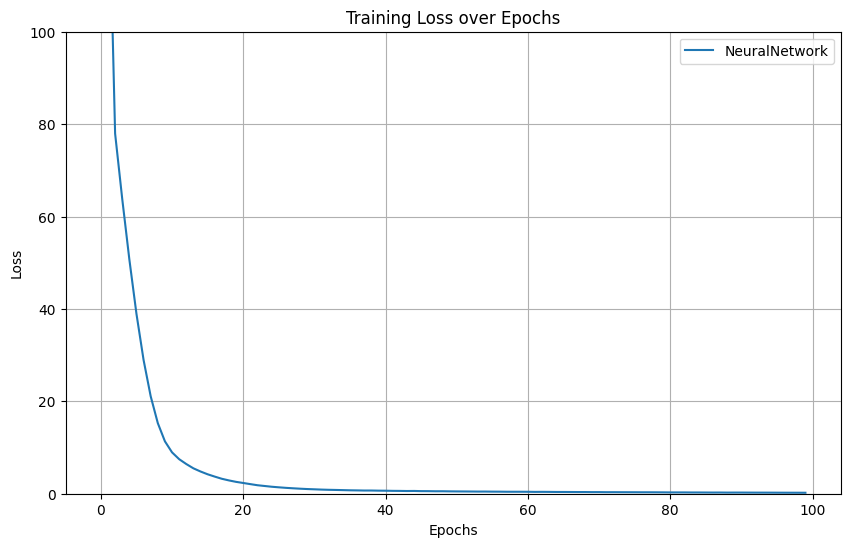

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.ylim(0, 100)

plt.plot(nnLoss,label='NeuralNetwork')

plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('foo.png')
plt.show()